In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from skyfield.api import load, Topos
from scipy.optimize import newton
planets = load('de423.bsp')

In [2]:
class plutino:
    """
    generate plutinos
    units: au, radius
    
    """
    def __init__(self):
        self.size = 10000
        self.lambda_N = 0
        self.a = self.gen_a()
        self.e = self.gen_e()
        self.i = self.gen_i()
        self.amp = self.gen_amp()
        self.phi = self.gen_phi(self.amp)
        self.M = self.gen_M()
        self.node = self.gen_node()
        self.arg = self.gen_arg(self.phi, self.M, self.node, self.lambda_N)
        self.H = self.gen_H()
        cut = self.e > 0
        print cut.sum()
        self.a = self.a[cut]
        self.e = self.e[cut]
        self.i = self.i[cut]
        self.amp = self.amp[cut]
        self.phi = self.phi[cut]
        self.M = self.M[cut]
        self.node = self.node[cut]
        self.arg = self.arg[cut]
        self.H = self.H[cut]       
        self.X, self.Y, self.Z, self.E, self.v = zip(*map(self.kep_to_xyz, self.a, self.e, self.i, self.arg, self.node, self.M))
    
    def gen_a(self):
        return 39.45 + np.random.random(self.size) * 0.4 - 0.2
        
    def gen_e(self):
        return np.random.normal(loc=0.175, scale=0.06, size = self.size)
        
    def gen_i(self):
        return np.arcsin(np.random.rayleigh(scale = 12 * np.pi/180., size = self.size))
        
    def gen_amp(self):
        return np.random.triangular(0, 5, 10, size = self.size) * np.pi / 180.
    
    def gen_phi(self, amp):
        return np.pi + amp * np.sin(2*np.pi*np.random.random(self.size))
        
    def gen_M(self):
        return 4*np.pi*np.random.random(self.size)
        
    def gen_node(self):
        return 2*np.pi*np.random.random(self.size)
        
    def gen_arg(self, phi, M, node, lambda_N):
        return (0.5*phi - 1.5*M - node + lambda_N) % (2*np.pi)
        
    def gen_H(self):
        alpha = 0.9
        h0 = 0
        h1 = 10
        h0s10 = 10**(alpha*h0)
        h1s10 = 10**(alpha*h1)
        return np.log10(np.random.random(self.size)*(h1s10-h0s10) + h0s10) / alpha
        
    def kep_to_xyz(self, a, e, i, arg, node, M):
        #print a, e, i, arg, node, M
        # compute eccentric anomaly
        f = lambda E, M, e: E - e * np.sin(E) - M + 5/4.*e**2*np.sin(2*M)
        E0 = M
        E = newton(f, E0, args=(M, e))
        # compute true anomaly
        v = 2 * np.arctan2((1 + e)**0.5*np.sin(E/2.), (1 - e)**0.5*np.cos(E/2.))
        # compute the radius
        r = a * (1 - e * np.cos(E))
        # compute X,Y,Z
        X = r * (np.cos(node) * np.cos(arg + v) - np.sin(node) * np.sin(arg + v) * np.cos(i))
        Y = r * (np.sin(node) * np.cos(arg + v) + np.cos(node) * np.sin(arg + v) * np.cos(i))
        Z = r * (np.sin(i) * np.sin(arg + v))
        return X, Y, Z, E, v
        
    def xyz_to_equa(self, X, Y, Z):
        dec = np.arcsin(Z/(X**2+Y**2+Z**2)**0.5)
        ra = np.arctan2(Y, X)

In [3]:
p = plutino()
print p.arg.max(), p.arg.min()
print p.M.max(), p.M.min()
print p.node.max(), p.node.min()
print max(p.E), min(p.E)
print max(p.v), min(p.v)
print (np.array(p.v)+p.arg).max(), (np.array(p.v)+p.arg).min()

9983
6.28315469637 0.000722973236943
12.5658301368 0.00121572259952
6.28313208641 0.00074414668159
12.5657729723 0.00136220995448
6.28317724031 -6.28225109978
12.3954919132 -6.14664867564


(array([ 396.,  398.,  461.,  540.,  742.,  716.,  555.,  452.,  417.,
         342.,  375.,  352.,  446.,  516.,  726.,  756.,  581.,  458.,
         390.,  364.]),
 array([ -6.28225110e+00,  -5.65397968e+00,  -5.02570827e+00,
         -4.39743685e+00,  -3.76916543e+00,  -3.14089401e+00,
         -2.51262260e+00,  -1.88435118e+00,  -1.25607976e+00,
         -6.27808347e-01,   4.63070265e-04,   6.28734487e-01,
          1.25700590e+00,   1.88527732e+00,   2.51354874e+00,
          3.14182016e+00,   3.77009157e+00,   4.39836299e+00,
          5.02663441e+00,   5.65490582e+00,   6.28317724e+00]),
 <a list of 20 Patch objects>)

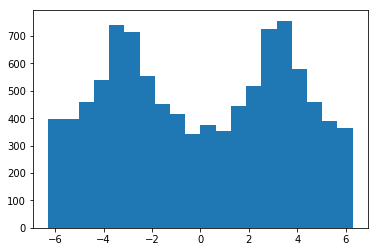

In [4]:
plt.hist(p.v, bins=20)

(array([  5.09000000e+02,   1.32900000e+03,   1.68900000e+03,
          1.73900000e+03,   1.55400000e+03,   1.19200000e+03,
          8.19000000e+02,   5.22000000e+02,   2.90000000e+02,
          1.59000000e+02,   8.30000000e+01,   4.50000000e+01,
          3.50000000e+01,   1.10000000e+01,   1.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  0.14721215,   3.78216394,   7.41711572,  11.05206751,
         14.68701929,  18.32197108,  21.95692286,  25.59187465,
         29.22682643,  32.86177822,  36.49673   ,  40.13168179,
         43.76663357,  47.40158536,  51.03653714,  54.67148893,
         58.30644071,  61.9413925 ,  65.57634428,  69.21129607,  72.84624785]),
 <a list of 20 Patch objects>)

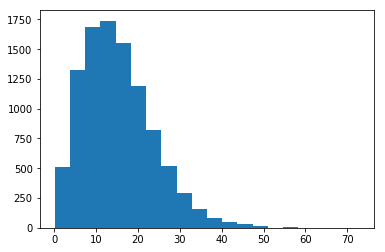

In [5]:
plt.hist(p.i*180/np.pi, bins=20)

(array([   31.,    76.,   157.,   280.,   465.,   711.,  1014.,  1209.,
         1291.,  1263.,  1154.,   870.,   636.,   428.,   196.,   128.,
           41.,    18.,     9.,     6.]),
 array([ 0.00048673,  0.02039137,  0.040296  ,  0.06020063,  0.08010526,
         0.10000989,  0.11991452,  0.13981915,  0.15972378,  0.17962841,
         0.19953305,  0.21943768,  0.23934231,  0.25924694,  0.27915157,
         0.2990562 ,  0.31896083,  0.33886546,  0.35877009,  0.37867473,
         0.39857936]),
 <a list of 20 Patch objects>)

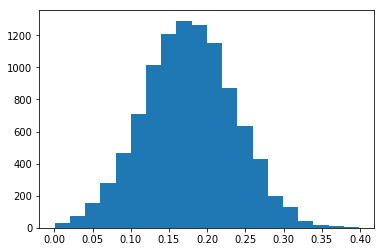

In [6]:
plt.hist(p.e, bins=20)

(array([ 507.,  507.,  511.,  502.,  480.,  491.,  471.,  478.,  507.,
         510.,  501.,  502.,  500.,  514.,  492.,  498.,  513.,  528.,
         487.,  484.]),
 array([ 39.25000965,  39.27000718,  39.29000472,  39.31000225,
         39.32999979,  39.34999732,  39.36999486,  39.3899924 ,
         39.40998993,  39.42998747,  39.449985  ,  39.46998254,
         39.48998007,  39.50997761,  39.52997514,  39.54997268,
         39.56997021,  39.58996775,  39.60996528,  39.62996282,  39.64996035]),
 <a list of 20 Patch objects>)

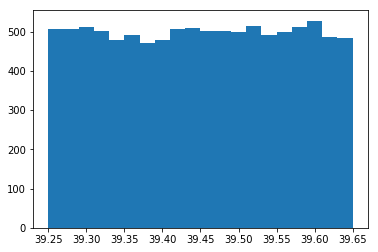

In [7]:
plt.hist(p.a, bins=20)

(array([  51.,  164.,  247.,  344.,  457.,  547.,  628.,  719.,  827.,
         908.,  946.,  848.,  793.,  626.,  585.,  513.,  329.,  245.,
         146.,   60.]),
 array([ 0.01121004,  0.50831558,  1.00542112,  1.50252666,  1.9996322 ,
         2.49673774,  2.99384328,  3.49094882,  3.98805436,  4.4851599 ,
         4.98226544,  5.47937098,  5.97647652,  6.47358206,  6.9706876 ,
         7.46779314,  7.96489868,  8.46200422,  8.95910977,  9.45621531,
         9.95332085]),
 <a list of 20 Patch objects>)

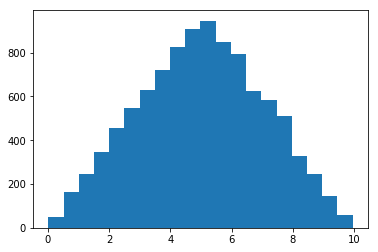

In [8]:
plt.hist(p.amp*180/np.pi, bins=20)

(array([  24.,   91.,  184.,  287.,  486.,  658.,  728.,  785.,  826.,
         899.,  876.,  797.,  807.,  725.,  675.,  461.,  314.,  213.,
         113.,   34.]),
 array([ 2.97095488,  2.9879225 ,  3.00489011,  3.02185773,  3.03882534,
         3.05579296,  3.07276057,  3.08972818,  3.1066958 ,  3.12366341,
         3.14063103,  3.15759864,  3.17456626,  3.19153387,  3.20850149,
         3.2254691 ,  3.24243672,  3.25940433,  3.27637195,  3.29333956,
         3.31030717]),
 <a list of 20 Patch objects>)

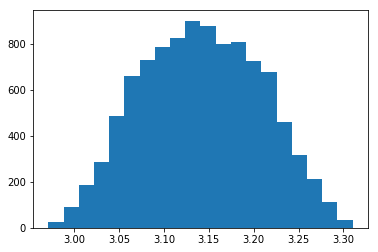

In [9]:
plt.hist(p.phi, bins=20)

(array([  5.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   3.00000000e+00,   5.00000000e+00,
          2.10000000e+01,   2.10000000e+01,   2.80000000e+01,
          4.20000000e+01,   6.40000000e+01,   1.04000000e+02,
          1.71000000e+02,   2.53000000e+02,   3.99000000e+02,
          6.04000000e+02,   9.29000000e+02,   1.46900000e+03,
          2.31300000e+03,   3.54600000e+03]),
 array([ 5.78281834,  5.99367499,  6.20453165,  6.4153883 ,  6.62624496,
         6.83710161,  7.04795827,  7.25881492,  7.46967158,  7.68052823,
         7.89138489,  8.10224154,  8.31309819,  8.52395485,  8.7348115 ,
         8.94566816,  9.15652481,  9.36738147,  9.57823812,  9.78909478,
         9.99995143]),
 <a list of 20 Patch objects>)

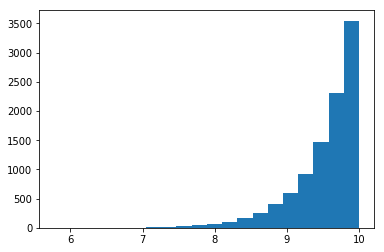

In [10]:
#plt.yscale('log')
plt.hist(p.H, bins=20)

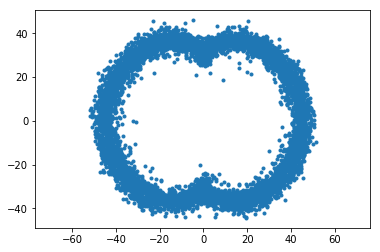

In [11]:
plt.axis('equal')
plt.scatter(p.X,p.Y, marker = '.')

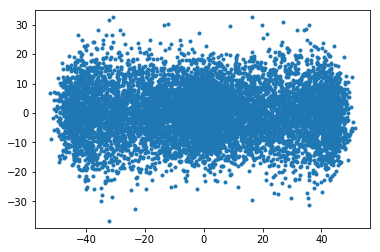

In [12]:
plt.axis('equal')
plt.plot(p.X,p.Z, '.')

In [13]:
def kep_to_xyz(a, e, i, arg, node, M):
    f = lambda E, M, e: E - e * np.sin(E) - M
    E0 = M
    E = newton(f, E0, args=(M, e))
    v = 2 * np.arctan2((1 + e)**0.5*np.sin(E/2.), (1 - e)**0.5*np.cos(E/2.))
    r = a * (1 - e * np.cos(E))
    X = r * (np.cos(node) * np.cos(arg + v) - np.sin(node) * np.sin(arg + v) * np.cos(i))
    Y = r * (np.sin(node) * np.cos(arg + v) + np.cos(node) * np.sin(arg + v) * np.cos(i))
    Z = r * (np.sin(i) * np.sin(arg + v))
    return X, Y, Z   

In [14]:
a =100+np.zeros(100)
e = 0.7+np.zeros(100)
i = np.pi/10. +np.zeros(100)
arg =  np.pi/10.+np.zeros(100)
node =  np.pi/10.+np.zeros(100)
M = np.arange(0, 2*np.pi, 2*np.pi/100.)

In [15]:
x, y, z = zip(*map(kep_to_xyz, a, e, i, arg, node, M))

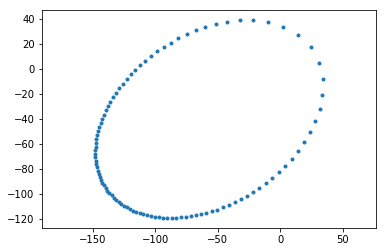

In [16]:
plt.axis('equal')
plt.scatter(x, y, marker = '.')